<a href="https://colab.research.google.com/github/Starboy177/DataScience/blob/main/JasoHasiU5proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
from scipy.interpolate import PchipInterpolator

I used the Iris dataset for this project. I am going to be comparing petal lengths to petal widths because they seem to have the most linear relationship.

In [ ]:
flowers = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/iris.csv')
flowers

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


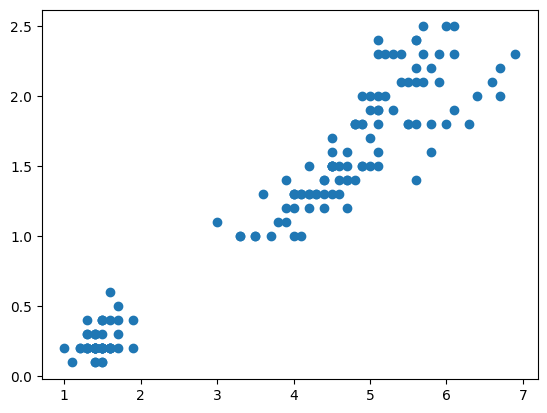

In [ ]:
plt.scatter(x=flowers.petal_length, y=flowers.petal_width)

In [ ]:
with pm.Model() as flowers_model:
  α = pm.Normal("α", mu=0, sigma=20)
  β = pm.Normal("β", mu=0, sigma=20)

  μ = pm.Deterministic("μ", α + β * flowers.petal_length)

  σ = pm.HalfNormal("σ", sigma = 10)

  y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=flowers.petal_width)

  idata_lba = pm.sample()

Output()

Output()

Text(0, 0.5, 'petal_width')

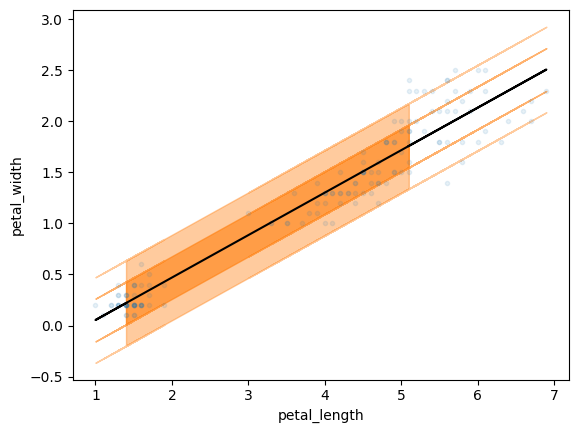

In [ ]:
_, ax = plt.subplots()

ax.plot(flowers.petal_length, flowers.petal_width, "C0.", alpha=0.1)

posterior_lba = az.extract(idata_lba)

μ_m = posterior_lba["μ"].mean("sample").values
σ_m = posterior_lba["σ"].mean("sample").values

ax.plot(flowers.petal_length, μ_m, c="k")
ax.fill_between(flowers.petal_length, μ_m + 1 * σ_m, μ_m - 1 * σ_m, alpha=0.6, color="C1")
ax.fill_between(flowers.petal_length, μ_m + 2 * σ_m, μ_m - 2 * σ_m, alpha=0.4, color="C1")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")

The graph seems to show a pretty good linear relationship between petal width and length, although there are no petals with lengths between 2 and 3, which I find a bit odd. The gap shows that there are two seperate groups of data.

In [ ]:
pm.sample_posterior_predictive(
    idata_lba, model = flowers_model, extend_inferencedata=True
    )

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y_pred'>

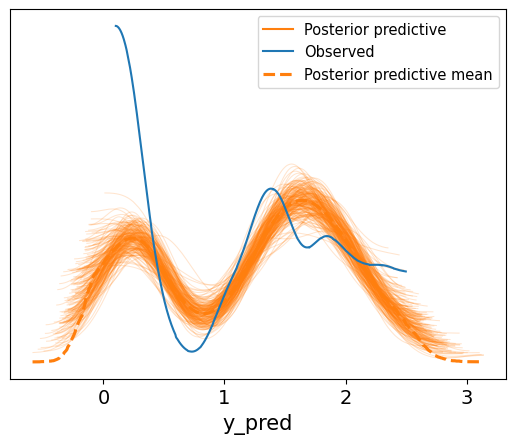

In [ ]:
az.plot_ppc(idata_lba, num_pp_samples=200, colors=["C1", "C0", "C1"])

The observed data does not fit the best, but it works better than any of the other models I tried. I think the tail at the front of the graph might be a result of outliers in the data, such as the gap in petal length form 2-3, but I'm not exactly sure what caused it. The relationship might also not be stricly linear.